# sklean

## метрические алгоритмы, линейная регрессия, логистическая регрессия

In [1]:
import pandas as pd
import numpy as np
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


## служебные функции

In [137]:
def plot_2d_separator(classifier, X, fill=False, twocolor=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1001)
    yy = np.linspace(y_min, y_max, 1001)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        try:
            decision_values = classifier.predict_proba(X_grid)[:, 1]
        except:
            decision_values = classifier.predict(X_grid)
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        c = decision_values.reshape(X1.shape)
        if twocolor:
            print (fill_levels)
            ax.contourf(X1, X2, c,
                        levels=fill_levels, colors=['#FFCCCC', '#CC55CC'], alpha=0.2)
            ax.contour(X1, X2, c,
                       levels=np.linspace(c.min(), c.max(), 15), alpha=0.5, colors="white")             
            
        else:
            ax.contourf(X1, X2, c,
                        levels=np.linspace(c.min(), c.max(), 30), cmap=plt.cm.binary, alpha=0.5)
#         ax.contour(X1, X2, c,
#                     levels=np.linspace(c.min(), c.max(), 30), alpha=0.5, colors="white")        

    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(()) 

# модельная задача

,0,1
0,-0.367175,-7.386298
1,16.458885,-12.053496
2,4.160909,-6.695729
3,4.614862,-10.819098
4,14.520257,-7.090963


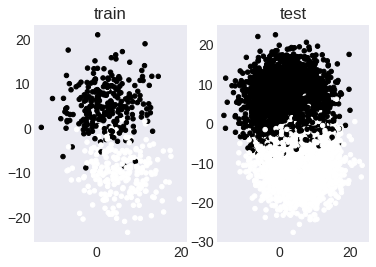

In [124]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

n_centers = 2
seed, n_data = 10, 10000

X, y = make_blobs(n_samples=n_data, n_features=2,
                                centers=n_centers, random_state=seed,
                                cluster_std=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=33)

plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], 20, y_train)
plt.title('train')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:,0], X_test[:,1], 20, y_test)
plt.title('test')
pd.DataFrame(X_train[:5,:])

## логистическая регрессия

In [135]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
prediction_train = classifier.predict(X_train)
prediction_test = classifier.predict(X_test)

[-15.649534896232442, 0, 16.611949666005057]
[-18.715094270197362, 0, 17.88331223837737]


,0,1
0,-0.367175,-7.386298
1,16.458885,-12.053496
2,4.160909,-6.695729
3,4.614862,-10.819098
4,14.520257,-7.090963


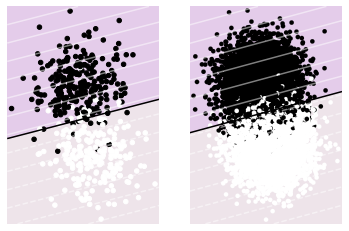

In [138]:
plt,subplot(1, 2, 1)
plot_2d_separator(classifier, X_train, fill=True, twocolor=True)
plt.scatter(X_train[:,0], X_train[:,1], 20, y_train)
plt,subplot(1, 2, 2)
plot_2d_separator(classifier, X_test, fill=True, twocolor=True)
plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, lw=0.1)
pd.DataFrame(X_train[:5,:])

In [25]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, prediction_test))

[[4499  253]
 [ 413 4335]]


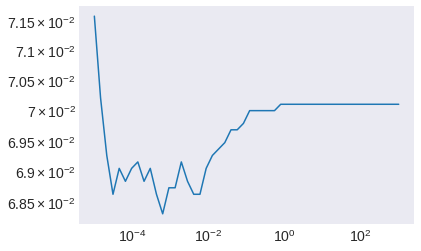

In [30]:
param_space = np.logspace(-5, 3)
errors = []
for C in param_space:
    classifier = LogisticRegression(C=C)
    classifier.fit(X_train, y_train)
    prediction_test = classifier.predict(X_test)
    errors.append(np.mean(prediction_test != y_test))
    
plt.plot(param_space, errors)
plt.xscale('log')
plt.yscale('log')  

In [38]:
classifier.coef_, classifier.intercept_

(array([[-0.14226587,  0.59215823]]), array([1.67888599]))

In [107]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
model = NearestCentroid()
model.fit(X_train, y_train)

prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

In [109]:
model.centroids_

array([[ 5.6801746 , -9.6717882 ],
       [ 2.33891223,  5.2429304 ]])

[0, 0.5, 1]
[0, 0.5, 1]


,0,1
0,-0.367175,-7.386298
1,16.458885,-12.053496
2,4.160909,-6.695729
3,4.614862,-10.819098
4,14.520257,-7.090963


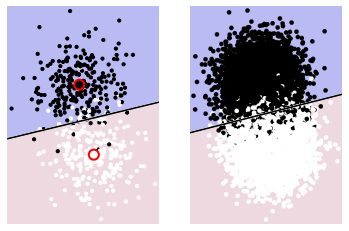

In [118]:
plt,subplot(1, 2, 1)
plot_2d_separator(model, X_train, fill=True, twocolor=True)
plt.scatter(X_train[:,0], X_train[:,1], 10, y_train)
plt.scatter(model.centroids_[:, 0], model.centroids_[:, 1], 100, [2, 3], lw=2, edgecolor='r')
plt,subplot(1, 2, 2)
plot_2d_separator(model, X_test, fill=True, twocolor=True)
plt.scatter(X_test[:,0], X_test[:,1], 20, y_test, lw=0.1)
pd.DataFrame(X_train[:5,:])

# ближайший сосед

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
0.8969473684210526
[0, 0.5, 1]


(-14.196136663249522,
 20.725779373955262,
 -24.394740652796926,
 21.922439427366406)

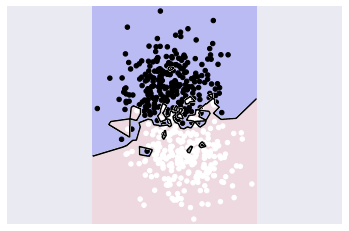

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print (knn)
print (knn.score(X_test, y_test))

plot_2d_separator(knn, X_train, fill=True, twocolor=True);
plt.scatter(X_train[:, 0], X_train[:, 1], 20, y_train);
plt.axis('equal')

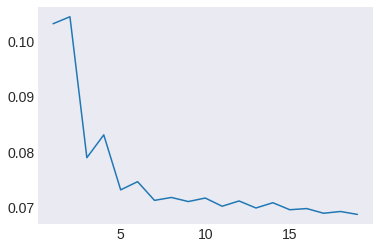

In [120]:
param_space = np.arange(1,20)
errors = []
for k in param_space:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction_test = classifier.predict(X_test)
    errors.append(np.mean(prediction_test != y_test))
    
plt.plot(param_space, errors) 

# явное вычисление ближайших соседей

In [140]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=n_neighbors)
model.fit(X_train, y_train)
closest_distances, indices = model.kneighbors(X_test, n_neighbors=n_neighbors)


# nn = NearestNeighbors(algorithm='brute', 
#                               metric='mahalanobis', 
#                               metric_params={'V': np.cov(X)})

* сделать простейшую весовую схему

In [148]:
X = np.array([0, 2, 0, 1, 1, 10, 11])[:, np.newaxis]

model = NearestNeighbors(n_neighbors=2)
model.fit(X)
S = model.kneighbors_graph(X, n_neighbors=2)
S.todense()

matrix([[1., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1.]])

# Metric Learning

[0, 0.5, 1]


(-13.186558071447262,
 16.569600197827086,
 -23.037854289045114,
 21.80473305248866)

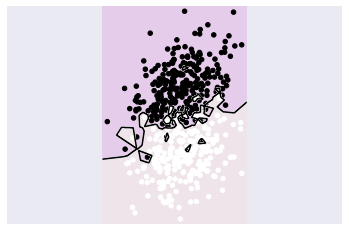

In [139]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(max_iter=30, random_state=10)
nca = nca.fit(X_train, y_train)
X_embedded_train = nca.transform(X_train)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_embedded_train, y_train)

plot_2d_separator(knn, X_embedded_train, fill=True, twocolor=True);
plt.scatter(X_embedded_train[:, 0], X_embedded_train[:, 1], 20, y_train);
plt.axis('equal')

# какие бывают датасеты

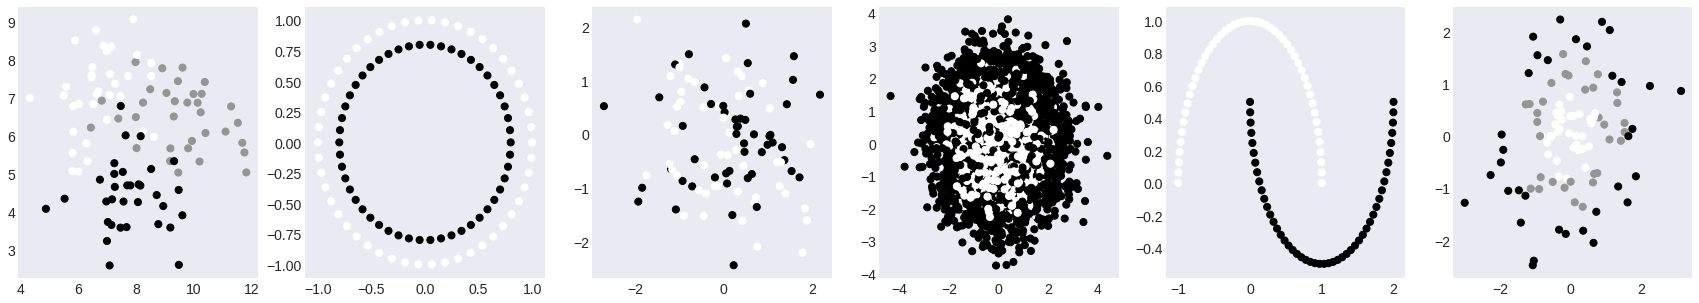

In [48]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.datasets import make_moons
from sklearn.datasets import make_gaussian_quantiles

datasets = [make_blobs, make_circles, make_classification,
            make_hastie_10_2, make_moons, make_gaussian_quantiles]

k = len(datasets)

plt.figure(figsize=(30, 5))
for i, f in enumerate(datasets):
    X, y = f()
    plt.subplot(1, k, i + 1)
    plt.scatter(X[:,0], X[:,1], 50, y)
    

# регрессия

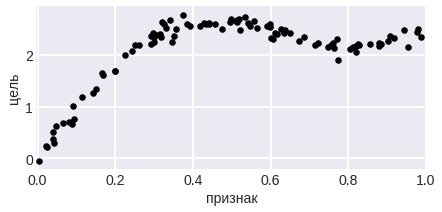

In [85]:
n_samples = 100
np.random.seed(10)
X = np.random.rand(n_samples)
y = np.sin(5 * X) + 5 * np.log1p(X) + 0.1 * np.random.randn(n_samples)


plt.figure(figsize=(7, 3))
plt.scatter(X, y, 30, 'k')
plt.grid(lw=2)
plt.xlim([-0.003, 1.003])
plt.xlabel('признак');
plt.ylabel('цель');

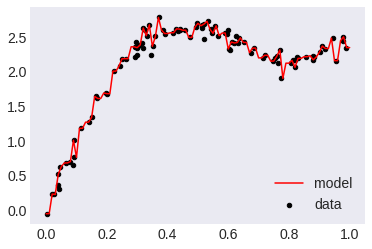

In [75]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X[:, np.newaxis], y)

xspace = np.linspace(0, 1, 101)
a = kneighbor_regression.predict(xspace[:, np.newaxis])

plt.scatter(X, y, 20, 'k', label="data")
plt.plot(xspace, a, 'red', label="model")
plt.legend(loc='best')

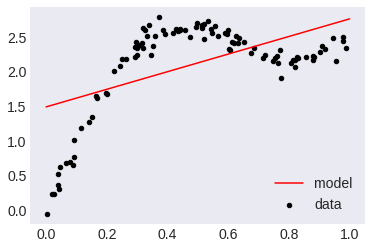

In [86]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X[:, np.newaxis], y)

xspace = np.linspace(0, 1, 101)
a = model.predict(xspace[:, np.newaxis])

plt.scatter(X, y, 20, 'k', label="data")
plt.plot(xspace, a, 'red', label="model")
plt.legend(loc='best')

# полиномиальная регрессия

In [87]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
f = [[1,0],[2,1],[3,2]]
pf.fit(f)
pf.transform(f)

array([[1., 1., 0., 1., 0., 0.],
       [1., 2., 1., 4., 2., 1.],
       [1., 3., 2., 9., 6., 4.]])

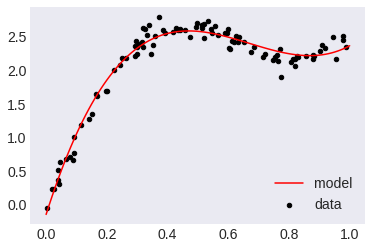

In [95]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)

model = Ridge(alpha=0.001)
model.fit(pf.fit_transform(X[:, np.newaxis]), y)

xspace = np.linspace(0, 1, 101)
a = model.predict(pf.transform(xspace[:, np.newaxis]))

plt.scatter(X, y, 20, 'k', label="data")
plt.plot(xspace, a, 'red', label="model")
plt.legend(loc='best')

# нормировки данных

In [102]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
pd.DataFrame(X, columns=iris.feature_names).head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [97]:
print("mean : %s " % X.mean(axis=0))
print("standard deviation : %s " % X.std(axis=0))

mean : [5.84333333 3.05733333 3.758      1.19933333] 
standard deviation : [0.82530129 0.43441097 1.75940407 0.75969263] 


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [99]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15] 
standard deviation : [1. 1. 1. 1.] 


# пайплайны

In [100]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
pipeline.fit(X, y)
pipeline.score(X, y)

0.9533333333333334

# свои модели

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class RFplusROT(BaseEstimator, ClassifierMixin):  
    """пример классификатора"""

    def __init__(self, model):
        """
        Инициализация
        """
        self.model = model
    @staticmethod
    def rotX(X):
        """
        Добавить 'случайные проекции'
        """
        XX = np.hstack([X.dot([1.0, 0.0])[:, np.newaxis],
                        X.dot([0.0, 1.0])[:, np.newaxis],
                        X.dot([0.5, 0.5])[:, np.newaxis],
                        X.dot([0.5, -0.5])[:, np.newaxis],
                        X.dot([0.33, 0.67])[:, np.newaxis],
                        X.dot([0.67, 0.33])[:, np.newaxis]])
        return (XX)
        


    def fit(self, X, y=None):
        """
        Обучение
        """
        self.model.fit(self.rotX(X), y)

        return self


    def predict(self, X, y=None):
        """
        классификация
        """
        
        return(self.model.predict(self.rotX(X), y))

    def predict_proba(self, X, y=None):
        """
        вероятность
        """
        
        return(self.model.predict_proba(self.rotX(X)))